In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [4]:
x=df.iloc[:,[1,2]]

In [5]:
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
wcss=[]
sil_score={}
for k in range(2,21):
    km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
    sil_score[k]=silhouette_score(x,km.labels_)

In [8]:
wcss

[3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 174800337.7,
 119633613.78333332,
 92633459.69999999,
 66500114.333333336,
 42000112.333333336,
 21833432.166666668,
 14291766.333333332,
 10125026.166666668,
 8125016.666666667,
 6125012.166666667,
 4125010.166666667,
 2625007.5,
 1500007.0,
 1000002.5]

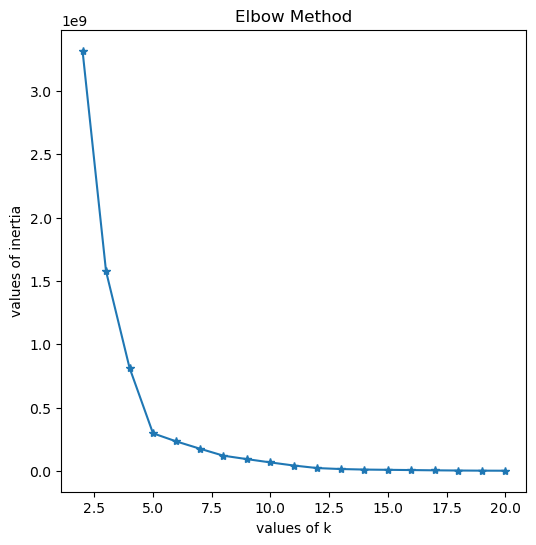

In [10]:
plt.figure(figsize=(6,6))
plt.title("Elbow Method")
plt.xlabel("values of k")
plt.ylabel("values of inertia")
plt.plot(range(2,21),wcss,marker="*")

In [12]:
sil_score

{2: 0.8191238627089519,
 3: 0.6555650934726583,
 4: 0.6367554081285947,
 5: 0.6804880448325714,
 6: 0.6342099452488426,
 7: 0.5560217549357689,
 8: 0.5396702268525042,
 9: 0.5536445324322425,
 10: 0.5027354003691632,
 11: 0.44436152133984375,
 12: 0.44907297675051966,
 13: 0.4317854315929608,
 14: 0.40390991680469207,
 15: 0.3452500209177634,
 16: 0.28625626163514767,
 17: 0.21580170907834323,
 18: 0.15454610701578272,
 19: 0.1431823797432878,
 20: 0.07272791672884339}

In [13]:
km1=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=1)
c_labels=km1.fit_predict(x)

In [14]:
c_labels

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1])

In [15]:
df['Target']=c_labels

In [16]:
df

,Name,Age,Income($),Target
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,3


In [17]:
km1.cluster_centers_

array([[3.92000000e+01, 1.56600000e+05],
       [3.52857143e+01, 6.30000000e+04],
       [3.63333333e+01, 8.40000000e+04],
       [3.60000000e+01, 1.33500000e+05],
       [2.84000000e+01, 4.93000000e+04]])

In [18]:
centroid_df=pd.DataFrame(km1.cluster_centers_,columns=['X','Y'])
centroid_df

,X,Y
0,39.200000,156600.0
1,35.285714,63000.0
2,36.333333,84000.0
3,36.000000,133500.0
4,28.400000,49300.0


In [19]:
x.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [21]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df['Age']=mn.fit_transform(df[['Age']])
df['Income($)']=mn.fit_transform(df[['Income($)']])

df.head()

In [23]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['Age','Income($)']])
ypred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [24]:
df['Cluster']=ypred

In [25]:
df.head()

,Name,Age,Income($),Target,Cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,2


In [26]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [28]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
